In [2]:
using Pkg
Pkg.activate("test_diom_tr")

Pkg.develop(path="/home/corde/Krylov.jl")
Pkg.develop(path="/home/corde/JSOSolvers.jl")

Pkg.add("OptimizationProblems")
Pkg.add("SolverTools")
Pkg.add("SolverCore")
Pkg.add("SolverBenchmark")
Pkg.add("NLPModelsIpopt")
Pkg.add("JLD2")
Pkg.add("Plots")

using LinearAlgebra, NLPModels, ADNLPModels, Printf, LinearOperators, Krylov
using OptimizationProblems, OptimizationProblems.ADNLPProblems, JSOSolvers, SolverTools, SolverCore, SolverBenchmark, NLPModelsIpopt
using JLD2, Plots

  Activating project at `~/mth8408/projet/test_diom_tr`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Chang

In [3]:
meta = OptimizationProblems.meta
problem_list = meta[(meta.variable_nvar.==true).&(meta.ncon.==0).&.!meta.has_bounds.&(meta.minimize.==true), :name]

88-element Vector{String}:
 "NZF1"
 "arglina"
 "arglinb"
 "arglinc"
 "argtrig"
 "arwhead"
 "auglag"
 "bdqrtic"
 "boundary"
 "brownal"
 ⋮
 "sparsqur"
 "spmsrtls"
 "srosenbr"
 "tointgss"
 "tquartic"
 "tridia"
 "vardim"
 "variational"
 "woods"

In [4]:
probs = OptimizationProblems.meta
problem_names = probs[(probs.ncon .== 0) .& .!probs.has_bounds .& (80 .<= probs.nvar .<= 100) .& (meta.minimize.==true), :name]
# problem_names = probs[(probs.ncon .== 0) .& .!probs.has_bounds .& (5 .<= probs.nvar .<= 40) .& (meta.minimize.==true), :name]
problems = (eval(Meta.parse(problem))() for problem ∈ problem_names)

Base.Generator{Vector{String}, var"#15#16"}(var"#15#16"(), ["NZF1", "arglina", "arglinb", "arglinc", "argtrig", "arwhead", "auglag", "bdqrtic", "boundary", "brownal"  …  "sparsine", "sparsqur", "spmsrtls", "srosenbr", "tointgss", "tquartic", "tridia", "vardim", "variational", "woods"])

In [ ]:
solvers = Dict(
    # :ipopt => nlp -> ipopt(nlp, print_level=0),
    # :trunk_cg => nlp -> trunk(nlp, verbose=0),
    # :trunk_diom_2 => nlp -> trunk(nlp, verbose=0, subsolver=:diom, subsolver_kwargs=(memory=2,)),
    # :trunk_diom_50 => nlp -> trunk(nlp, verbose=0, subsolver=:diom, subsolver_kwargs=(memory=50,)),
)


Dict{Symbol, Function} with 2 entries:
  :trunk_diom_50 => #18
  :trunk_diom_2  => #17

┌ Info: running solver trunk_diom_50
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/bmark_solvers.jl:21
┌ Info:          Solver             Name    nvar    ncon           status    iter      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:97
┌ Info:   trunk_diom_50             NZF1      91       0      first_order       8   1.2e+00   2.1e+04   4.2e-07   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:   trunk_diom_50          arglina     100       0      first_order       5   5.8e-01   5.0e+01   3.8e-15   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:   trunk_diom_50          arglinb     100       0      first_order       1   4.6e-01   2.5e+01   1.6e-03   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:   tr

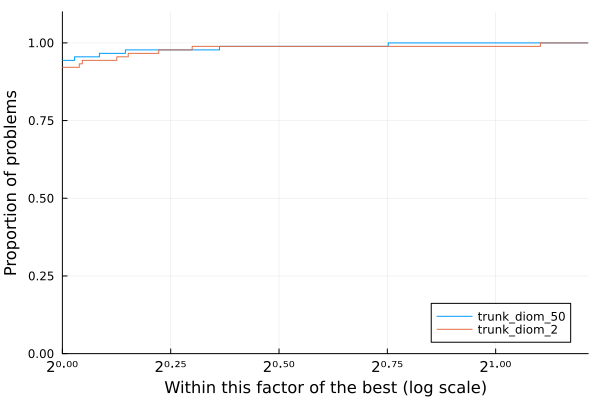

In [7]:
# solve problems, but skip one of our choice
to_skip = ["thurber"]
stats = bmark_solvers(solvers, problems, skipif = prob -> prob.meta.name ∈ to_skip)

# save DataFrame for later
# see JLD2 documentation
@save "stats_opt_problems.jld2" stats

# plot time profile
# performance_profile(stats, df -> df.neval_obj)
performance_profile(stats, df -> df.iter)

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /home/corde/.julia/packages/BenchmarkProfiles/NM9XN/src/performance_profiles.jl:16


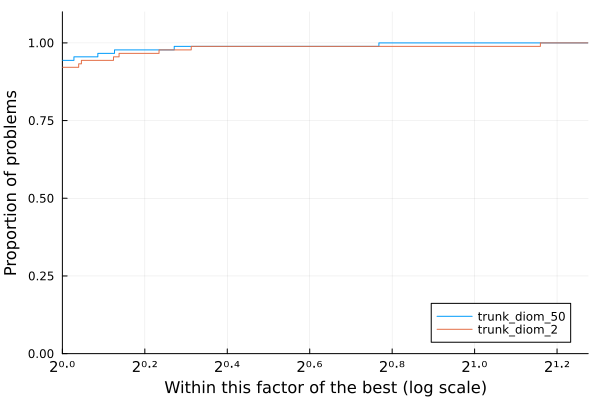

In [11]:
# performance_profile(stats, df -> df.neval_hprod)
performance_profile(stats, df -> df.neval_grad)